<a href="https://colab.research.google.com/github/CodeCrafter-101/Object_Detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAY 1: SETUP AND IMAGE DETECTION

YOLO - you only look once
popular AI model for object detection and also give the predicting ratio and accuracy of the prediction

pillow is for working with the images used for image raccognization

In [1]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.5 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("UPLOADED", file_name)

Saving Screenshot 2025-07-07 180942.png to Screenshot 2025-07-07 180942.png
UPLOADED Screenshot 2025-07-07 180942.png


In [4]:
model = YOLO('yolov8n.pt')

In [5]:
results = model(file_name)
annotated = results[0].plot()


image 1/1 /content/Screenshot 2025-07-07 180942.png: 352x640 2 persons, 79.4ms
Speed: 11.8ms preprocess, 79.4ms inference, 361.5ms postprocess per image at shape (1, 3, 352, 640)



image 1/1 /content/Screenshot 2025-07-07 180942.png: 352x640 2 persons, 6.1ms
Speed: 1.7ms preprocess, 6.1ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)


(np.float64(-0.5), np.float64(1517.5), np.float64(803.5), np.float64(-0.5))

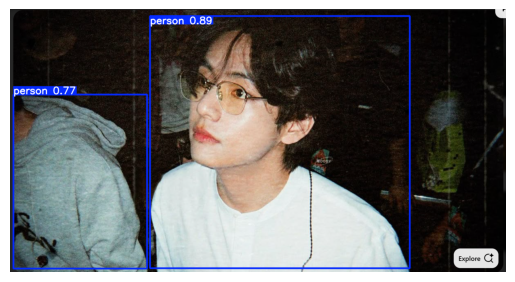

In [6]:

results = model(file_name)
annotated = results[0].plot()

# BGR2RGB will do the box thing around the object detected
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')

DAY 2: OBJECT DETECTION ON VIDEO

GOAL: Use YOLO to detect objects in video frames.
- Load and process video fole frame-by-frame
- Save output video with bounding boxes.

In [ ]:
uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print("UPLOADED", video_path)

In [ ]:
output_path = "output_detected.mp4"

# CV2 is reponsible for img and video
# cap, drop, frame height are the constants with matched/compare the original with the output
cap = cv2.VideoCapture(video_path)

# it handels the widtth and height of the original video with the output one.
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# it does the detection and if it's unable the or 25.0 will be performed
fps = cap.get(cv2.CAP_PROP_FPS)or 25.0

# it chosses the mp4v file video
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_count = 0
while True:
  ret, frame = cap.read()
  if not ret:
    break
  result = model(frame)
  annoated = results[0].plot()
  out.write(annoated)
  frame_count += 1
  if frame_count % 100 == 0:
    print(f"Processed {frame_count} frames")
cap.release()
out.release()

print()

DAY 3: LIVE WEBCAM DETECTION

GOAL: Detect objects from webcam feed in real time.
- Use OpencCV's webcam capture
- Display detection in real-time window.

Captured: snapshot.jpg

image 1/1 /content/snapshot.jpg: 480x640 1 cell phone, 47.0ms
Speed: 1.6ms preprocess, 47.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


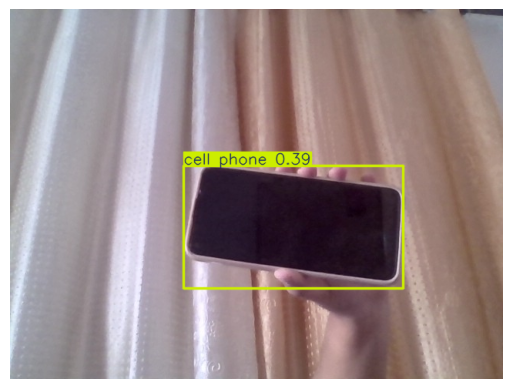

In [9]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import output
from base64 import b64decode

model = YOLO('yolov8n.pt')

def take_photo(filename = 'snapshot.jpg'):
    js = """
   async function takePhoto() {
     const div = document.createElement('div');
     const capture = document.createElement('button');
     capture.textContent = 'Capture';
     div.appendChild(capture);
     document.body.appendChild(div);


     const video = document.createElement('video');
     video.style.display = 'block';
     const stream = await navigator.mediaDevices.getUserMedia({video: true});
     document.body.appendChild(video);
     video.srcObject = stream;
     await video.play();


     // Resize window
     google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);


     // Wait for Capture button
     await new Promise((resolve) => capture.onclick = resolve);


     const canvas = document.createElement('canvas');
     canvas.width = video.videoWidth;
     canvas.height = video.videoHeight;
     canvas.getContext('2d').drawImage(video, 0, 0);
     stream.getTracks().forEach(track => track.stop());
     const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
     div.remove();
     return imgData;
   }
   takePhoto();
   """

    data = output.eval_js(js)
    with open(filename, 'wb') as f:
        f.write(b64decode(data))
    return filename

filename = take_photo('snapshot.jpg')
print(f'Captured:',filename)

results = model(filename)
annotated = results[0].plot()

plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
import glob
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()
for img_name in uploaded.keys():
  print (f"Processing {img_name}...")
  results = model(img_name)
  annotated = results[0].plot()
  plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

DAY 4: MINI YOLO TRAINING

GOAL: Train yolo on a small dataset.
- Use sample COCO dataset subset or your own dataset
- Train for few epoch and evaluate.

In [11]:
!pip install ultralytics --quiet
from ultralytics import YOLO

In [12]:
model = YOLO('yolov8n.pt')

In [13]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset
!ls dataset/coco128

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  10.3M      0 --:--:-- --:--:-- --:--:-- 42.7M
images	labels	LICENSE  README.txt


In [14]:
%%writefile dataset/coco128.yaml
path: /content/dataset/coco128 # Corrected path
train: images/train2017
val: images/train2017

names:
 0: person
 1: bicycle
 2: car
 3: motorcycle
 4: airplane
 5: bus
 6: train
 7: truck
 8: boat
 9: traffic light
 10: fire hydrant
 11: stop sign
 12: parking meter
 13: bench
 14: bird
 15: cat
 16: dog
 17: horse
 18: sheep
 19: cow
 20: elephant
 21: bear
 22: zebra
 23: giraffe
 24: backpack
 25: umbrella
 26: handbag
 27: tie
 28: suitcase
 29: frisbee
 30: skis
 31: snowboard
 32: sports ball
 33: kite
 34: baseball bat
 35: baseball glove
 36: skateboard
 37: surfboard
 38: tennis racket
 39: bottle
 40: wine glass
 41: cup
 42: fork
 43: knife
 44: spoon
 45: bowl
 46: banana
 47: apple
 48: sandwich
 49: orange
 50: broccoli
 51: carrot
 52: hot dog
 53: pizza
 54: donut
 55: cake
 56: chair
 57: couch
 58: potted plant
 59: bed
 60: dining table
 61: toilet
 62: tv
 63: laptop
 64: mouse
 65: remote
 66: keyboard
 67: cell phone
 68: microwave
 69: oven
 70: toaster
 71: sink
 72: refrigerator
 73: book
 74: clock
 75: vase
 76: scissors
 77: teddy bear
 78: hair drier
 79: toothbrush

Writing dataset/coco128.yaml


In [15]:
model = YOLO('yolov8n.pt')
model.train(
    data= "/content/dataset/coco128.yaml",
    epochs = 10,
    imgsz = 640,
    project = 'YOLO_Training',
    name = 'yolov8n_custom'
)

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1989f1a030>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [16]:
results= model.predict("/content/dataset/coco128/images/train2017/000000000036.jpg", save = True)


image 1/1 /content/dataset/coco128/images/train2017/000000000036.jpg: 640x512 1 person, 1 umbrella, 46.4ms
Speed: 2.3ms preprocess, 46.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)
Results saved to /content/YOLO_Training/yolov8n_custom2


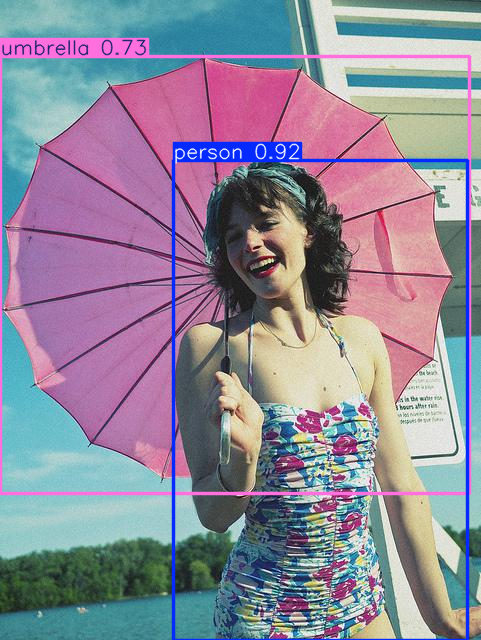

In [17]:
results[0].show()

DAY 5: BUILD A SIMPLE STREAMLIT APP

GOAL: Deploy YOLOmodel with a streamlit UI.
- Upload image or video
- Display detection result

In [ ]:
!pip install streamlit==1.38.0 ultralytics==8.3.0 pyngrok==7.1.6 opencv-python-headless pillow pandas

  Using cached streamlit-1.38.0-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached ultralytics-8.3.0-py3-none-any.whl.metadata (34 kB)
  Using cached pyngrok-7.1.6-py3-none-any.whl.metadata (7.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 126.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
%%writefile app_streamlit.py
import streamlit as st
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2, tempfile, os, glob
import pandas as pd
from pathlib import Path


st.set_page_config(page_title="Object Detection (DevTown)", layout="wide")
background_url = "https://i.ibb.co/FqVqvBBN/web-back.png"




st.markdown(
   f"""
   <style>
   .stApp {{
       background: url("{background_url}") no-repeat center center fixed;
       background-size: cover;
   }}
   /* Sidebar styling */
   section[data-testid="stSidebar"] {{
       background: rgba(0, 0, 0, 0.3);
       backdrop-filter: blur(10px);
       border-radius: 12px;
       padding: 10px;
   }}
   /* File uploader styling */
   div[data-testid="stFileUploader"] {{
       background: rgba(0, 0, 0, 0.3);
       backdrop-filter: blur(10px);
       border-radius: 12px;
       padding: 15px;
   }}
   /* DataFrame styling */
   .stDataFrame {{
       background: rgba(255, 255, 255, 0.85);
       border-radius: 12px;
       padding: 10px;
       box-shadow: 0 4px 10px rgba(0,0,0,0.3);
   }}
   /* Dark text */
   h1, h2, h3, h4, h5, h6, p, label, span, div {{
       color: #1a1a1a !important;
       font-weight: 500;
   }}
   </style>
   """,
   unsafe_allow_html=True
)


st.title("Object Detection (DevTown)")


uploaded_weights = st.sidebar.file_uploader("Upload custom .pt weights (optional)", type=["pt"])
conf = st.sidebar.slider("Confidence threshold", 0.0, 1.0, 0.25, 0.01)
img_size = st.sidebar.selectbox("Inference image size (px)", [320, 416, 640, 1280], index=2)


@st.cache_resource
def load_model(weights_path="yolov8n.pt"):
   return YOLO(weights_path)


def save_uploaded_file(uploaded_file, suffix=""):
   suffix = suffix if suffix else Path(uploaded_file.name).suffix
   tf = tempfile.NamedTemporaryFile(delete=False, suffix=suffix)
   tf.write(uploaded_file.getbuffer())
   tf.flush()
   return tf.name


def annotate_and_table(results, model):
   res = results[0]
   try:
       plotted = res.plot()
       annotated = cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB)
   except Exception:
       annotated = res.orig_img if hasattr(res, "orig_img") else None


   detections = []
   try:
       boxes = res.boxes
       if boxes is not None and len(boxes) > 0:
           for c, cf, box in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy(), boxes.xyxy.cpu().numpy()):
               name = model.names[int(c)]
               detections.append({"class": name, "conf": float(cf), "bbox": [float(x) for x in box]})
   except:
       detections = []


   return annotated, pd.DataFrame(detections)


weights_to_load = "yolov8n.pt"
if uploaded_weights:
   weights_to_load = save_uploaded_file(uploaded_weights, suffix=".pt")
   st.sidebar.success("Using uploaded weights")


model = load_model(weights_to_load)


mode = st.radio("Select input", ["Image upload", "Video upload"])


if mode == "Image upload":
   uploaded = st.file_uploader("Upload image", type=["jpg","jpeg","png"])
   if uploaded:
       img = Image.open(uploaded).convert("RGB")
       st.image(img, caption="Input image")
       results = model.predict(np.array(img), conf=conf, imgsz=img_size)
       annotated, df = annotate_and_table(results, model)
       if annotated is not None:
           st.image(annotated, caption="Annotated")
       if not df.empty:
           st.dataframe(df)


elif mode == "Video upload":
   uploaded_vid = st.file_uploader("Upload video", type=["mp4","mov","avi","mkv"])
   if uploaded_vid:
       tmp = save_uploaded_file(uploaded_vid)
       st.video(tmp)
       project_dir = tempfile.mkdtemp()
       results = model.predict(source=tmp, conf=conf, imgsz=img_size, project=project_dir, name="run", save=True)
       try:
           out_dir = str(results[0].save_dir)
           vids = glob.glob(os.path.join(out_dir, "*"))
           vids = [v for v in vids if Path(v).suffix.lower() in [".mp4",".avi",".mov",".mkv"]]
           if vids:
               st.success("Annotated video")
               st.video(vids[0])
       except:
           st.warning("Could not display annotated video")







Writing app_streamlit.py


In [ ]:
from pyngrok import ngrok

NGROK_AUTH_TOKEN = "******"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

public_url = ngrok.connect(port='8501')
print("Public URL", public_url)

!streamlit run app_streamlit.py --server.port 8501 &

import time
while True:
  time.sleep(60)